In [10]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error

import matplotlib.pyplot as plt


In [18]:
url = 'Dataset/StudentsPerformance.csv'
data = pd.read_csv(url)
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [12]:
#Memeriksa apakah ada nilai dalam dataset yang " kosong " atau NaN
print(data.isnull().values.any())
print(data.isnull().sum())
#Mengisi nilai yang hilang missing values
data = data.fillna(data.mean(numeric_only=True))
print(data.isnull().sum())

False
gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64
gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64


In [19]:
#Memilih fitur (feature) dan target
feature = ['reading score', 'writing score', 'gender', 'parental level of education', 'lunch', 'test preparation course' ]
x = data[feature]
y = data['math score']

# MENJADIKAN DATA TYPE OBJECT MENJADI NUMERIK 
x = pd.get_dummies(x, columns=["gender","parental level of education","test preparation course", 'lunch'], drop_first=True)
print("\nJumlah fitur setelah One-Hot:", x.shape[1])


Jumlah fitur setelah One-Hot: 10


In [20]:
#Bagi dataset menjadi data latih dan data uji
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print("Shape of X_train :", x_train.shape)
print("Shape of X_test :", x_test.shape)
print("Shape of Y_train :", y_train.shape)
print("Shape of Y_test :", y_test.shape)


Shape of X_train : (800, 10)
Shape of X_test : (200, 10)
Shape of Y_train : (800,)
Shape of Y_test : (200,)


In [21]:
#Inisialisasi model
model = LinearRegression()
#Latih model menggunakan data latih
model.fit(x_train, y_train)
#Buat prediksi menngunakan data uji
y_pred = model.predict(x_test)

In [22]:
#Hitung metrik evaluasi
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)
print("Mean Absolute Percentage Error:", mape)

Mean Squared Error (MSE): 28.784498774277118
Root Mean Squared Error (RMSE): 5.365118710175677
R-squared (R2): 0.8817100023084021
Mean Absolute Percentage Error: 98675571032390.02


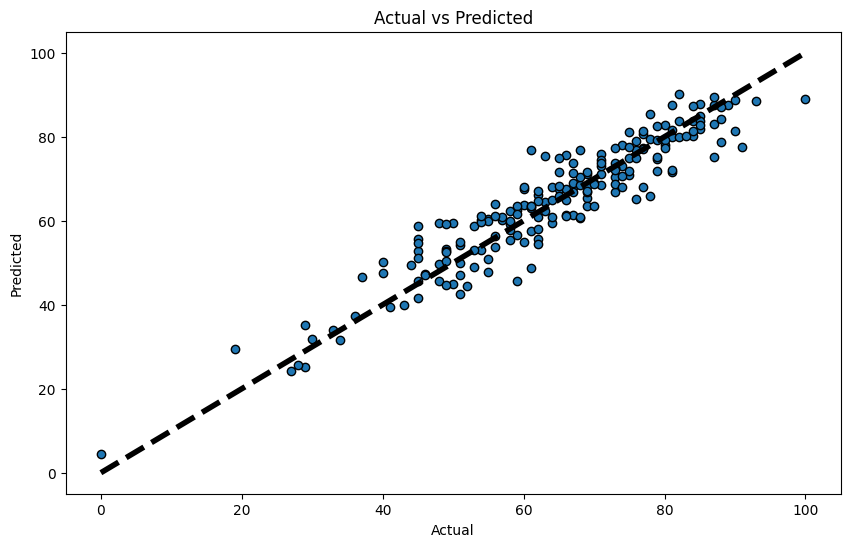

In [23]:
#Visualisasi hasil prediksi vs nilai aktual
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, edgecolors=(0,0,0))
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()